In [62]:
# Import các thư viện cần thiết
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from scipy.stats import randint

In [63]:
def plot_confusion_matrix(conf_matrix, class_labels, title='Confusion Matrix'):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title)
    plt.show()

In [64]:
# Đọc dữ liệu từ file CSV
data = pd.read_csv('Clustering_train.csv')
data_test = pd.read_csv('Clustering_test.csv')  

# Giả sử 'Phân khúc giá' là cột nhãn, và các cột còn lại là đặc trưng
X = data.drop('Phân khúc giá', axis=1)
y = data['Phân khúc giá']

X_test = data_test.drop('Phân khúc giá', axis=1)
y_test = data_test['Phân khúc giá']

# Mã hóa nhãn nếu cần thiết
label_mapping = {"Rất Cao": 0, "Cao": 1, "Trung Bình": 2, "Thấp": 3} 
y = np.array(y.map(label_mapping))
y_test = np.array(y_test.map(label_mapping))

class_names = [k for k, v in sorted(label_mapping.items(), key=lambda x: x[1])]

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.1, random_state=504)

MÔ HÌNH GRADIENT BOOSTING

In [65]:
# Định nghĩa các giá trị của các tham số cần tinh chỉnh
parameters = {
    'learning_rate': [0.3, 0.5, 0.8],
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 4, 5]
}
# Khởi tạo mô hình Gradient Boosting Classifier
model = GradientBoostingClassifier(loss='log_loss', random_state=15)

# Khởi tạo GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=parameters, cv=4, n_jobs=-1)

# Tìm kiếm tham số tốt nhất
grid_search.fit(X_train, y_train)

# Lấy mô hình tốt nhất
best_model = grid_search.best_estimator_

# Dự đoán 
gb_y_pred_train = best_model.predict(X_train)
gb_y_pred_validation = best_model.predict(X_validation)
gb_y_pred_test = best_model.predict(X_test)


# Đánh giá mô hình
gb_accuracy_train = accuracy_score(y_train, gb_y_pred_train)
gb_accuracy_validation = accuracy_score(y_validation, gb_y_pred_validation)
gb_accuracy_test = accuracy_score(y_test, gb_y_pred_test)

print("Best Parameters:", grid_search.best_params_)

print("Accuracy train:", gb_accuracy_train)
print("Classification Report:\n", classification_report(y_train, gb_y_pred_train, target_names=class_names))

print("Accuracy validation:", gb_accuracy_validation)
print("Classification Report:\n", classification_report(y_validation, gb_y_pred_validation, target_names=class_names))

print("Accuracy test:", gb_accuracy_test)
print("Classification Report:\n", classification_report(y_test, gb_y_pred_test, target_names=class_names))


Best Parameters: {'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 50}
Accuracy train: 0.8924731182795699
Classification Report:
               precision    recall  f1-score   support

     Rất Cao       0.98      0.93      0.95        55
         Cao       0.91      0.89      0.90       155
  Trung Bình       0.85      0.86      0.85       349
        Thấp       0.91      0.91      0.91       557

    accuracy                           0.89      1116
   macro avg       0.91      0.90      0.90      1116
weighted avg       0.89      0.89      0.89      1116

Accuracy validation: 0.76
Classification Report:
               precision    recall  f1-score   support

     Rất Cao       0.70      0.70      0.70        10
         Cao       0.75      0.60      0.67        15
  Trung Bình       0.54      0.50      0.52        26
        Thấp       0.84      0.89      0.86        74

    accuracy                           0.76       125
   macro avg       0.71      0.67      0.69       125


Ma trận nhầm lẫn (mô hình Gradient Boosting)

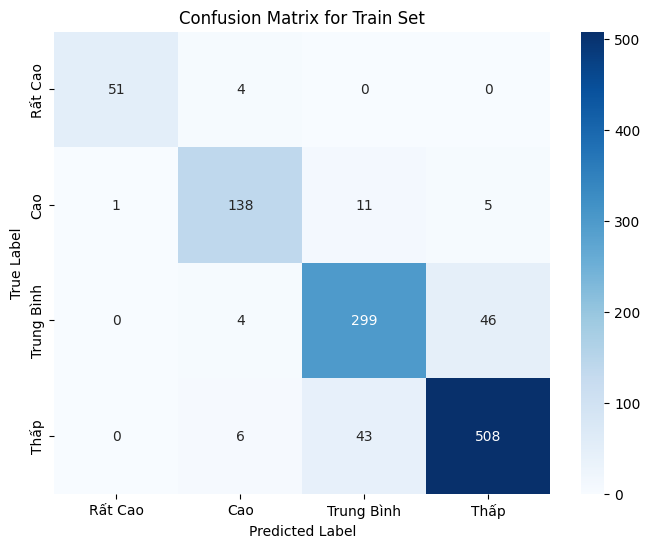

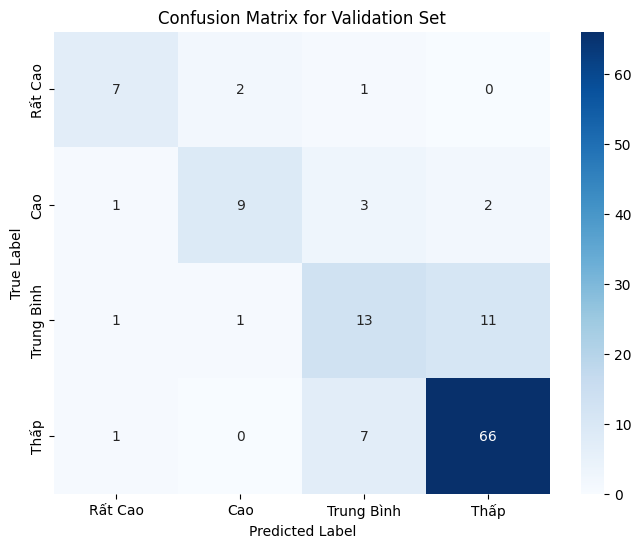

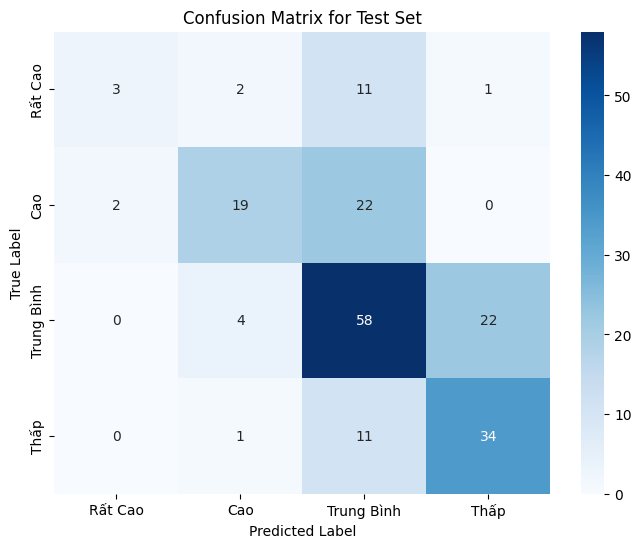

In [66]:
conf_matrix = confusion_matrix(y_train, gb_y_pred_train)
plot_confusion_matrix(conf_matrix, class_names, title='Confusion Matrix for Train Set')

conf_matrix = confusion_matrix(y_validation, gb_y_pred_validation)
plot_confusion_matrix(conf_matrix, class_names, title='Confusion Matrix for Validation Set')

conf_matrix_test = confusion_matrix(y_test, gb_y_pred_test)
plot_confusion_matrix(conf_matrix_test, class_names, title='Confusion Matrix for Test Set')

MÔ HÌNH RANDOM FOREST

In [67]:
# Thiết lập lưới tham số để tìm kiếm
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, 50],
    'min_samples_split': [2, 3],
    'criterion': ['gini', 'log_loss', 'entropy'],
}

# Khởi tạo mô hình Random Forest
rf = RandomForestClassifier(random_state=385)

# Khởi tạo RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist,
                                   n_iter=100, cv=5, scoring='accuracy')

# Tìm kiếm tham số tốt nhất
random_search.fit(X_train, y_train)

# Lấy mô hình tốt nhất
best_model = random_search.best_estimator_

# Dự đoán
rf_y_pred_train = best_model.predict(X_train)
rf_y_pred_validation = best_model.predict(X_validation)
rf_y_pred_test = best_model.predict(X_test)

# Đánh giá mô hình
rf_accuracy_train = accuracy_score(y_train, rf_y_pred_train)
rf_accuracy_validation = accuracy_score(y_validation, rf_y_pred_validation)
rf_accuracy_test = accuracy_score(y_test, rf_y_pred_test)

print("Best Parameters:", random_search.best_params_)

print("Accuracy train:", rf_accuracy_train)
print("Classification Report:\n", classification_report(y_train, rf_y_pred_train, target_names=class_names))

print("Accuracy validation:", rf_accuracy_validation)
print("Classification Report:\n", classification_report(y_validation, rf_y_pred_validation, target_names=class_names))

print("Accuracy test:", rf_accuracy_test)
print("Classification Report:\n", classification_report(y_test, rf_y_pred_test, target_names=class_names))

d:\Python312\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 72 is smaller than n_iter=100. Running 72 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Parameters: {'n_estimators': 300, 'min_samples_split': 3, 'max_depth': 10, 'criterion': 'log_loss'}
Accuracy train: 0.9202508960573477
Classification Report:
               precision    recall  f1-score   support

     Rất Cao       0.98      0.80      0.88        55
         Cao       0.89      0.85      0.87       155
  Trung Bình       0.88      0.91      0.90       349
        Thấp       0.95      0.96      0.95       557

    accuracy                           0.92      1116
   macro avg       0.92      0.88      0.90      1116
weighted avg       0.92      0.92      0.92      1116

Accuracy validation: 0.824
Classification Report:
               precision    recall  f1-score   support

     Rất Cao       0.75      0.60      0.67        10
         Cao       0.79      0.73      0.76        15
  Trung Bình       0.71      0.77      0.74        26
        Thấp       0.88      0.89      0.89        74

    accuracy                           0.82       125
   macro avg       0.78 

Ma trận nhầm lẫn (mô hình Random Forest)

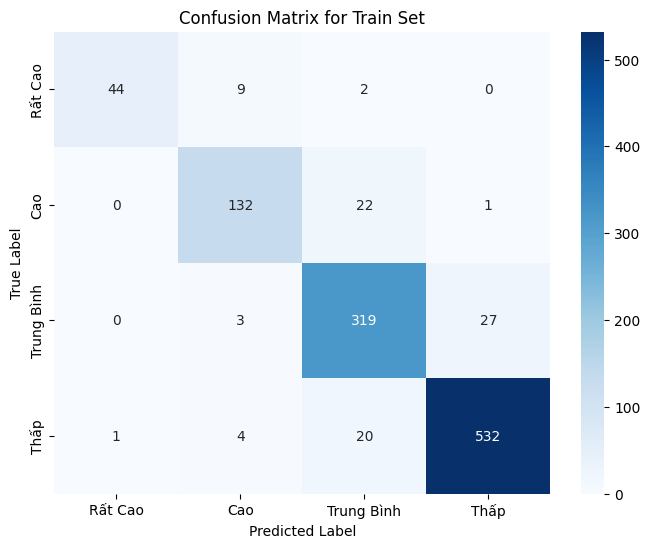

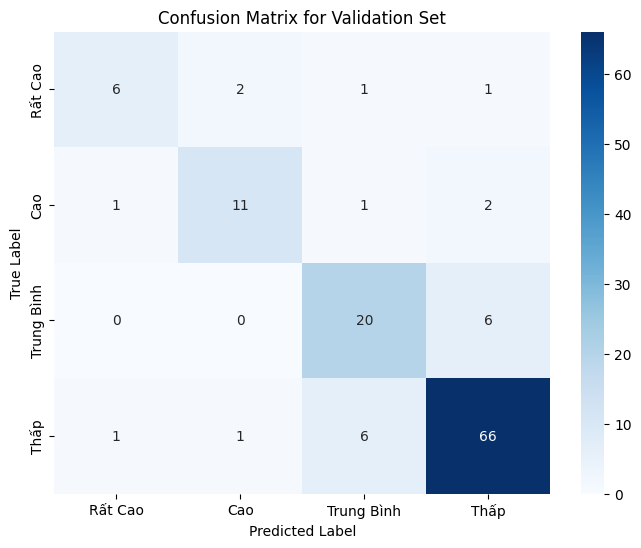

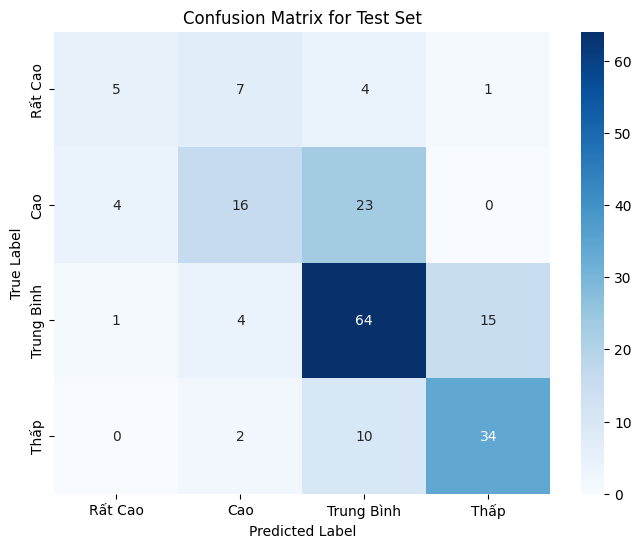

In [68]:
conf_matrix = confusion_matrix(y_train, rf_y_pred_train)
plot_confusion_matrix(conf_matrix, class_names, title='Confusion Matrix for Train Set')

conf_matrix = confusion_matrix(y_validation, rf_y_pred_validation)
plot_confusion_matrix(conf_matrix, class_names, title='Confusion Matrix for Validation Set')

conf_matrix_test = confusion_matrix(y_test, rf_y_pred_test)
plot_confusion_matrix(conf_matrix_test, class_names, title='Confusion Matrix for Test Set')

So sánh hiệu suất trên các tập dữ liệu của 2 mô hình

In [69]:
compare_data = []

compare_data.append(["Train", "Accuracy", rf_accuracy_train, gb_accuracy_train])
compare_data.append(["Validation", "Accuracy", rf_accuracy_validation, gb_accuracy_validation])
compare_data.append(["Test", "Accuracy", rf_accuracy_test, gb_accuracy_test])

result = pd.DataFrame(compare_data, columns=["Dataset", "Score", "Linear Regression", "Gradient Boosting"])
result

,Dataset,Score,Linear Regression,Gradient Boosting
0,Train,Accuracy,0.920251,0.892473
1,Validation,Accuracy,0.824000,0.760000
2,Test,Accuracy,0.626316,0.600000


In [70]:
sns.set_palette("magma")
def compare_3_data(title, accuracys):
    labels = ['Train', 'Validate', 'Test']
    x = range(len(labels))
    colors = sns.color_palette("magma", len(labels)) # Lấy danh sách màu từ palette
    plt.bar(x, accuracys, color=colors, width=0.4) # Sử dụng danh sách màu cho mỗi cột
    plt.xlabel('Dataset')
    plt.ylabel('Accuracy')
    plt.title(title)
    plt.xticks([i for i in x], labels)
    # Giới hạn giá trị trục y từ 0 đến 1
    plt.ylim(0, 1)
    for i, v in enumerate(accuracys):
        plt.text(i, v + 0.02, str(round(v, 2)), ha='center')
    plt.show()

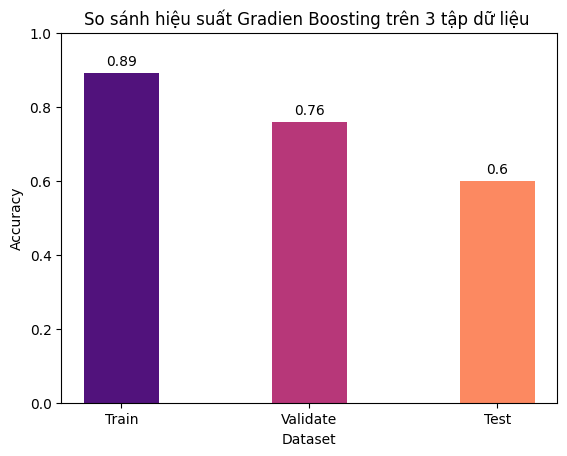

In [71]:
acc = []
acc.extend([gb_accuracy_train, gb_accuracy_validation, gb_accuracy_test])
compare_3_data("So sánh hiệu suất Gradien Boosting trên 3 tập dữ liệu ", acc)

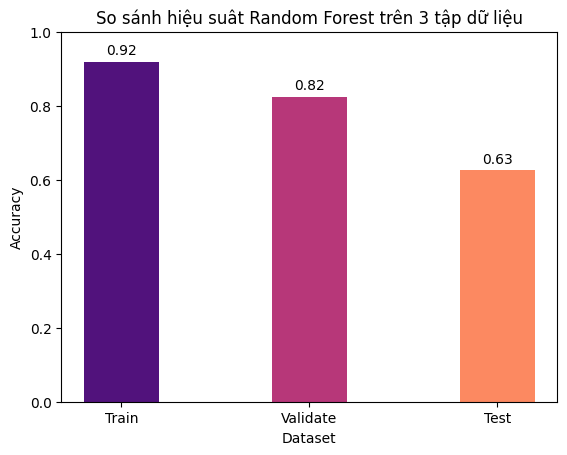

In [72]:
acc = []
acc.extend([rf_accuracy_train,rf_accuracy_validation,rf_accuracy_test])
compare_3_data("So sánh hiệu suât Random Forest trên 3 tập dữ liệu", acc)

### Kết luận

Số đo Accuracy của mô hình nào cao hơn thì mô hình đó có độ tin cậy cao hơn.  
Dựa vào kết quả so sánh, ta thấy mô hình Random Forest có chỉ số accuracy cao hơn mô hình Gradient Boosting trên cả 3 tập dữ liệu.  
Tuy nhiên, hiệu suất ở tập kiểm thử vẫn còn tương đối thấp do mô hình gặp khó khăn trong việc phân loại các lớp giá nhà “Cao” và “Rất Cao”.  